# Data description

# Training data analysis

First we install our required dependencies and import the dataset.

In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import os

headlines = pd.read_json("Sarcasm_Headlines_Dataset_v2.json")

Now let's have a look at our data.

In [3]:
headlines.head(10)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
5,0,my white inheritance
6,0,5 ways to file your taxes with less stress
7,1,richard branson's global-warming donation near...
8,1,shadow government getting too large to meet in...
9,0,lots of parents know this scenario


In [4]:
headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


We have two columns, `is_sarcastic` and `headline`, each containing 28'619 non-null entries.<br>
`is_sarcastic` describes whether the corresponding `headline` is sarcastic or not. It is always either one or zero. (1 = sarcastic, 0 = earnest)<br>
`headline` contains a string with the article's headline.

While I think it may be possible (and probably really funny) to let AI generate some sarcastic headlines, I would say `is_sarcastic` is better suited for a prediction, so that will be our goal.

## is_sarcastic
First we check out some of the function. Because of the nature of the data, being only ones and zeros, normally useful functions like the median or the standard deviation aren't all that useful. 
(The mean isn't very useful because it doesn't show another "middle" like it usually since all the values are either one or zero. There's no in-between the median could display. The standard deviation isn't useless, but it is going to be pretty high when scaled because if the mean is somewhere around 0.5 the standard deviation is going to be around 0.5 since all values are absolutes, no in-betweens.)

In [5]:
headlines.describe()

,is_sarcastic
count,28619.000000
mean,0.476397
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


A mean of around 47.6% is pretty good since this way, our model won't start to lean towards the side that is more likely just because it's more likely. We wan't it to base it's guess on the sentences and not on the *amount* of sarcastic sentences compared to non-sarcastic ones.

Now we check for missing values in the dataset.

In [6]:
print(headlines.isnull().sum())

is_sarcastic    0
headline        0
dtype: int64


There are no missing values in either column which is great since it saves us the effort of either replacing or deleting them.

## headlines
This is harder to analyze since words first have to be converted into numbers to be analyzed like usual. But first let's collect some simple stats.

In [7]:
total_len_sarc, total_len_ser, entries_sarc, entries_ser, strlen_sarc, strlen_ser = (0,)*6

for _, entry in headlines.iterrows():
    length = len(entry["headline"].split(" "))
    if entry["is_sarcastic"] == 1:
        total_len_sarc += length
        strlen_sarc += len(entry["headline"])
        entries_sarc += 1
        continue
    total_len_ser += length
    strlen_ser += len(entry["headline"])
    entries_ser += 1

print(f"Avg len sarcastic headlines: {total_len_sarc/entries_sarc}")
print(f"Avg len serious headlines: {total_len_ser/entries_ser}")
print(f"\nAvg strlen sarcastic headlines: {strlen_sarc/entries_ser}")
print(f"Avg strlen serious headlines: {strlen_ser/entries_ser}")



Avg len sarcastic headlines: 10.308493472201848
Avg len serious headlines: 9.818351685018351

Avg strlen sarcastic headlines: 59.44097430764097
Avg strlen serious headlines: 59.55862529195863


Well that didn't work, there doesn't seem to be much of a difference in the amount of words or in the amount of characters. In fact, it balances out surprisingly well. Probably a conscious decision of the dataset creator. Thanks.

Let's look at some more language-focussed data.

In [8]:
!python -m pip install wordcloud
!python -m pip install seaborn
!python -m pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


After installing all the necessary packages we can move on.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Super\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Super\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Super\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

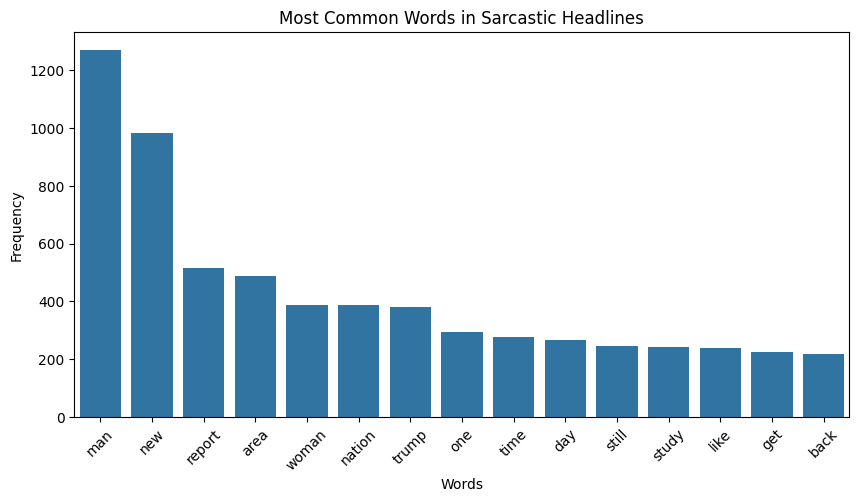

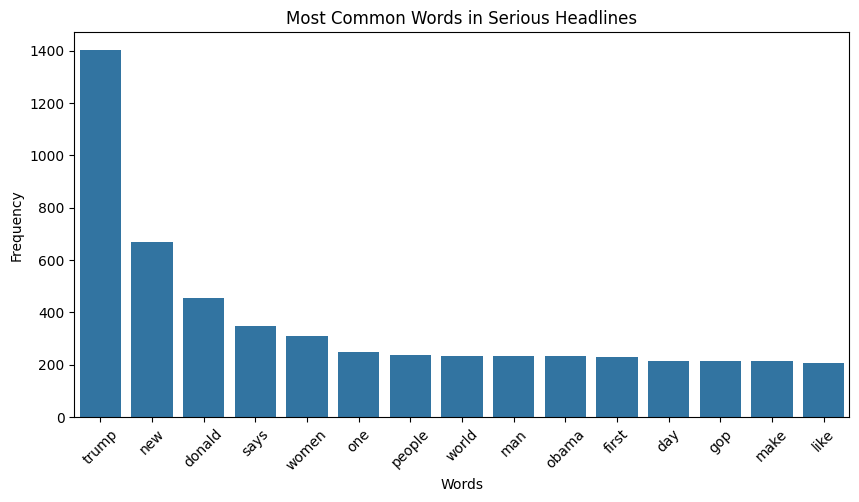

In [10]:
# create a copy that can be modified freely
df = headlines 

# Tokenizing and cleaning text (removing stopwords and punctuation)
stop_words = set(stopwords.words('english'))
words_sarc = [word.lower() 
                  for headline in df[df['is_sarcastic'] == 1]['headline'] 
                  for word in word_tokenize(headline) 
                  if word.isalnum() and word.lower() not in stop_words
                 ]
words_ser = [word.lower() 
                  for headline in df[df['is_sarcastic'] == 0]['headline'] 
                  for word in word_tokenize(headline) 
                  if word.isalnum() and word.lower() not in stop_words
                 ]

# Word frequency analysis
word_freq_sarc = Counter(words_sarc)
common_words_sarc = word_freq_sarc.most_common(15)

word_freq_ser = Counter(words_ser)
common_words_ser = word_freq_ser.most_common(15)

# Plot word frequency
plt.figure(figsize=(10,5))
sns.barplot(x=[word[0] for word in common_words_sarc], y=[word[1] for word in common_words_sarc])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words in Sarcastic Headlines")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=[word[0] for word in common_words_ser], y=[word[1] for word in common_words_ser])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words in Serious Headlines")
plt.xticks(rotation=45)
plt.show()

Finally, a difference is visible. Serious headlines are far more likely to contain the word 'trump' and sarcastic headlines are more likely to contain the word 'man'. Here this difference is so significant, that if this was a model that should be used in a more general fashion and over a longer period of time, we would have to consider excluding trump-related entries or at least artificially cutting it back. <br>
This is a problem known as [concept drift](https://en.wikipedia.org/wiki/Concept_drift).<br>
>**Concept drift**: <br>
When P(Y|X) changes but P(X) remains the same. This refers to the first decomposition of the joint distribution. This is also known as posterior shift. For example, in house price prediction model, house's area is an input parameter, suppose before covid-19, the house price is 200K, but after covid the house price has come down to 150K. So even though, the house features remain the same, the conditional distribution of the price of a house given its features has changed.

(Explanation taken from the [datascience stackexchange](https://datascience.stackexchange.com/a/122466) on the 07/03/2025) <br>
<small><sup>([backup link](https://web.archive.org/web/20240422005551/https://datascience.stackexchange.com/questions/115779/what-is-the-difference-between-covariate-shift-label-shift-concept-shift-conc/122466))<sup><small>

But, for this project at least, I think it's fine to just acknowledge it and move on.

Sarcastic headlines:


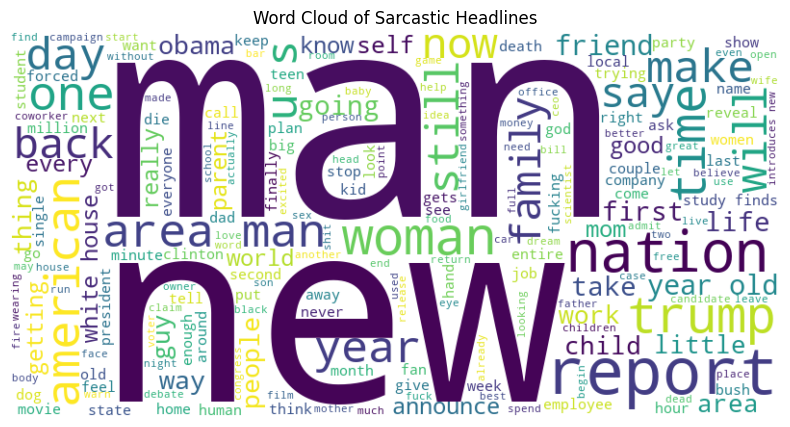

Non-Sarcastic headlines:


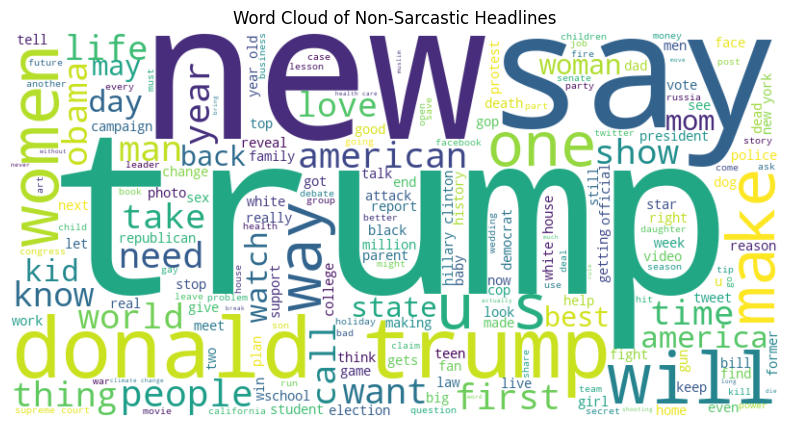

In [11]:
# For sarcastic headlines: concatenate all headlines into one text
sarc_text = " ".join(df[df['is_sarcastic'] == 1]['headline'].tolist())
sarc_wc = WordCloud(width=800, height=400, background_color='white').generate(sarc_text)

print("Sarcastic headlines:")
# Display the word cloud for sarcastic headlines
plt.figure(figsize=(10, 5))
plt.imshow(sarc_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Sarcastic Headlines")
plt.show()

# For non-sarcastic headlines: likewise, combine all headlines into one text
non_sarc_text = " ".join(df[df['is_sarcastic'] == 0]['headline'].tolist())
non_sarc_wc = WordCloud(width=800, height=400, background_color='white').generate(non_sarc_text)

print("Non-Sarcastic headlines:")
# Display the word cloud for non-sarcastic headlines
plt.figure(figsize=(10, 5))
plt.imshow(non_sarc_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Non-Sarcastic Headlines")
plt.show()

This is just a more fun way to look at the "Most common words in x headlines" graph from above.

## Scaling data
Scaling data is in this context not really sensible because `is_sarcastic` is already scaled (0 or 1, true or false, there is nothing to scale here) and you can't really "scale" text. (Can't really standardize, log-scale or min-max it.) Instead I will convert the text into a different form that ML-Algorithms can use, but *scaling* isn't sensible for this dataset.

I will now vectorize the words like done in the LA_1680_NLP task, but I might not use that approach later on. This is just so I can provide a substitute for a scaling process.

In [12]:
!python -m pip install spaCy
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------------------ --------------------- 5.8/12.8 MB 35.3 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 34.3 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 30.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")

# tqdm is a little library that gives us a nice progress bar
# it keeps you from terminating the process because you think 
# it froze, when in reality it would have just needed a few 
# more seconds but you terminated it and now you'll have to 
# start all over.
# ... not that that ever happened to me...
from tqdm.notebook import tqdm
tqdm.pandas()

def clean(sentence):
    doc = nlp(sentence)
    return " ".join([
        token.lemma_.lower() 
        for token in doc 
        if not (token.is_stop or token.is_punct)])

# here we are applying the clean-function we wrote above
headlines["headline"] = headlines["headline"].progress_apply(clean)
headlines.head(10)

  0%|          | 0/28619 [00:00<?, ?it/s]

,is_sarcastic,headline
0,1,thirtysomethe scientist unveil doomsday clock ...
1,0,dem rep totally nail congress fall short gende...
2,0,eat veggie 9 deliciously different recipe
3,1,inclement weather prevent liar get work
4,1,mother come pretty close word streaming correctly
5,0,white inheritance
6,0,5 way file taxis stress
7,1,richard branson global warm donation nearly co...
8,1,shadow government get large meet marriott conf...
9,0,lot parent know scenario


For now let's just save that new table so we can directly use it for the model and won't have to calculate it all over again.

In [14]:
headlines.to_json("Sarcasm_Headlines_Dataset_v2_tokenized.json")

In [15]:
os.listdir()

['.ipynb_checkpoints',
 'Data_description.ipynb',
 'Sarcasm_Headlines_Dataset.json',
 'Sarcasm_Headlines_Dataset_v2.json',
 'Sarcasm_Headlines_Dataset_v2_tokenized.json']